In [29]:
from keras.datasets import reuters
import numpy as np

In [26]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
type(train_data)
train_data.shape
test_data[0:]

In [28]:
#Decoding news wires
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [33]:
#Vectorizing training and testing samples
def vectorize_samples(data,dimension=10000):
  result = np.zeros((len(data),dimension))
  for i,j in enumerate(data):
    result[i,j] = 1
  return result

x_train = vectorize_samples(train_data)
x_test = vectorize_samples(test_data)

In [34]:
#Converting labels to one hot vectors
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [62]:
#Building the network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
#model.add(layers.Dense(128,activation='relu')) #can use 64
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
#validation data
x_val = x_train[:1000]
x_train_partial = x_train[1000:]
y_val = y_train[:1000]
y_train_partial = y_train[1000:]

In [ ]:
#training
history = model.fit(x_train_partial,y_train_partial,epochs=20,batch_size=512,validation_data=(x_val,y_val))

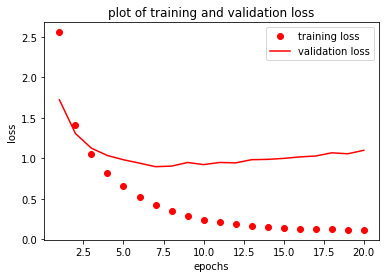

In [51]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('plot of training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

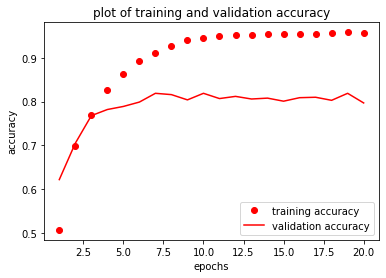

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,acc,'ro',label='training accuracy')
plt.plot(epochs,val_acc,'r',label='validation accuracy')
plt.title('plot of training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [63]:
#retraining the model for 7 epochs as the loss is minimum 
hist = model.fit(x_train_partial,y_train_partial,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 91ms/step - loss: 2.8334 - accuracy: 0.3739 - val_loss: 1.4411 - val_accuracy: 0.6600
Epoch 2/9
16/16 [==============================] - 1s 78ms/step - loss: 1.2470 - accuracy: 0.7171 - val_loss: 1.1656 - val_accuracy: 0.7540
Epoch 3/9
16/16 [==============================] - 1s 78ms/step - loss: 0.8680 - accuracy: 0.8120 - val_loss: 0.9942 - val_accuracy: 0.8000
Epoch 4/9
16/16 [==============================] - 1s 79ms/step - loss: 0.6405 - accuracy: 0.8618 - val_loss: 0.9420 - val_accuracy: 0.7990
Epoch 5/9
16/16 [==============================] - 1s 76ms/step - loss: 0.4464 - accuracy: 0.8994 - val_loss: 0.8915 - val_accuracy: 0.8290
Epoch 6/9
16/16 [==============================] - 1s 79ms/step - loss: 0.3278 - accuracy: 0.9279 - val_loss: 0.9273 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 78ms/step - loss: 0.2742 - accuracy: 0.9361 - val_loss: 0.9523 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [64]:
#Using a model with 128 units inthe hidden layer gives 1% increase in accuracy than a model with 64 units
#However increasing the number of hidden layers from 2 to 3 decreases the accuracy by 1%
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1950 - accuracy: 0.7747


[1.1950130462646484, 0.7747105956077576]